In [247]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [248]:
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [12,10,8,6,4,2]]).T
datos.columns = ["x1", "x2"]

In [249]:
datos

,x1,x2
0,2,12
1,4,10
2,6,8
3,8,6
4,10,4
5,12,2


<Axes: xlabel='x1', ylabel='x2'>

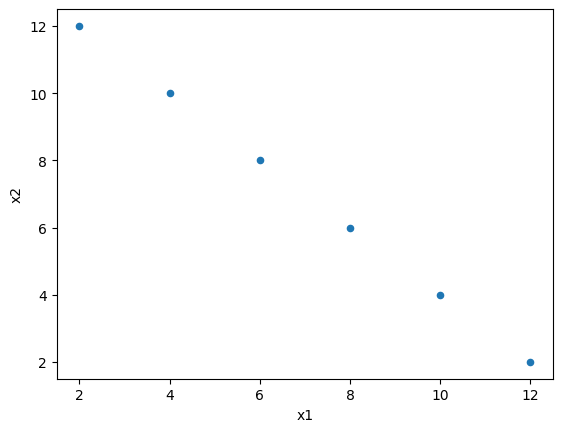

In [251]:
datos.plot.scatter("x1", y="x2")

In [252]:
std = StandardScaler()
std.fit(datos)

StandardScaler()

In [254]:
pca = PCA(n_components=1)
pca.fit(std.transform(datos))

PCA(n_components=1, random_state=22)

In [255]:
pca.explained_variance_ratio_

array([1.])

In [256]:
pd.DataFrame(
    data    = pca.components_,
    columns = datos.columns,
    index   = ['PC1']
)

,x1,x2
PC1,-0.707107,0.707107


In [257]:
proyecciones = np.dot(pca.components_, std.transform(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones

,PC1
0,2.070197
1,1.242118
2,0.414039
3,-0.414039
4,-1.242118
5,-2.070197


In [258]:
reconstruccion = pca.inverse_transform(X=proyecciones)
reconstruccion

,0,1
0,-1.46385,1.46385
1,-0.87831,0.87831
2,-0.29277,0.29277
3,0.29277,-0.29277
4,0.87831,-0.87831
5,1.46385,-1.46385


In [259]:
std.inverse_transform(reconstruccion)

array([[ 2., 12.],
       [ 4., 10.],
       [ 6.,  8.],
       [ 8.,  6.],
       [10.,  4.],
       [12.,  2.]])

In [260]:
# Repetir
datos = pd.DataFrame(data=[[2,4,6,8,10,12], [12*1.01,10*1.02,8*1.03,6*1.04,4*1.05,2*1.06]]).T
datos.columns = ["x1", "x2"]